## An Overfitting Example: Polynomial Curve Fitting

In [9]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [10]:
def true_fun(X):
    return np.sin(2 * np.pi * X)

In [11]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [12]:
n_samples = 10
degrees = [1, 3, 9]

In [13]:
X = np.linspace(0, 1, n_samples) # np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2

Degree= 1 , coefficients= [-1.36118231]
Degree= 3 , coefficients= [ 10.87929797 -31.8764529   21.09434724]
Degree= 9 , coefficients= [ 2.83070648e+01 -5.22064677e+02  4.31980690e+03 -1.75767780e+04
  3.84292338e+04 -4.66561786e+04  3.02002697e+04 -8.74708057e+03
  5.24493545e+02]


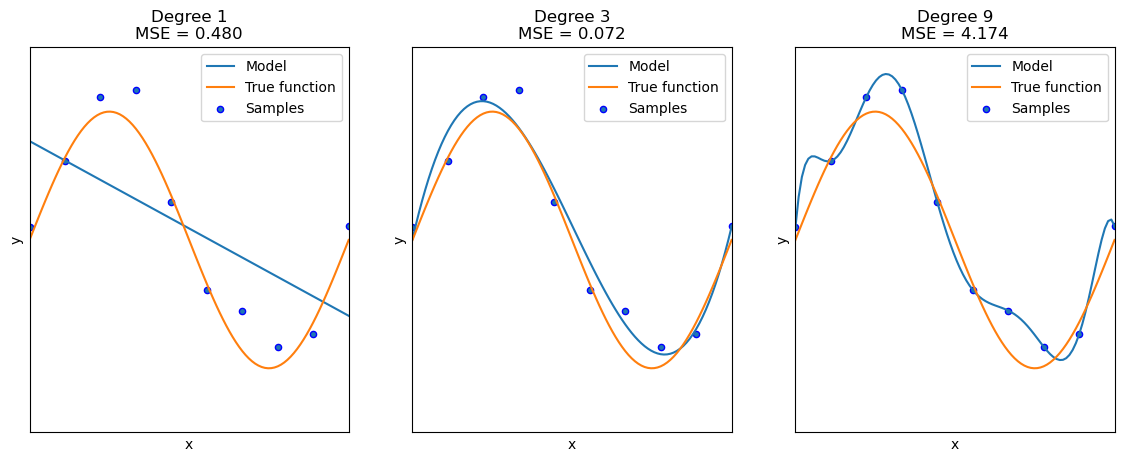

In [14]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print("Degree=", degrees[i], ", coefficients=", pipeline.steps[1][1].coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.3f}".format(degrees[i], -scores.mean()))

plt.show()

## End